# Graded Challenge 4 (Phase 1)


# I. Perkenalan

- Nama  : Ida Ayu Gede Ima Dewi Pertami
- Batch : HCK-004

Problem statement :
- Membuat model clustering untuk melakukan Customer Segmentation dari data kartu kredit sebuah bank dibawah ini. Data ini merupakan data informasi penggunaan kartu kredit selama 6 bulan terakhir.

Objective :
- Untuk melakukan Customer Segmentation (segmentasi pelanggan) berdasarkan data penggunaan kartu kredit selama 6 bulan terakhir dari nasabah sebuah bank. Dengan menggunakan teknik clustering, tujuan dari analisis ini adalah untuk mengelompokkan nasabah ke dalam kelompok-kelompok tertentu berdasarkan kesamaan karakteristik penggunaan kartu kredit mereka seperti jenis pembelian, jumlah pembelian, penggunaan limit kartu kredit, dan sebagainya.

Latar belakang :
- Latar belakang dataset ini adalah untuk membantu perusahaan pemrosesan pembayaran dan lembaga keuangan dalam mengidentifikasi pola penggunaan kartu kredit dan perilaku pengguna yang mendasarinya. Data tersebut mencakup berbagai informasi tentang pengguna kartu kredit seperti informasi demografi, penggunaan kartu kredit dan data transaksi, serta informasi tentang penggunaan saldo dan limit kartu kredit.
- Dataset Credit Card untuk Clustering biasanya digunakan untuk mengidentifikasi kelompok pelanggan berdasarkan pola penggunaan kartu kredit, sehingga dapat membantu perusahaan dalam mengembangkan strategi pemasaran yang tepat, penawaran promosi yang lebih baik, serta mengoptimalkan proses pengambilan keputusan dan manajemen risiko.

# II. Query SQL

SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_004_hck.credit-card-information`
WHERE MOD(CUST_ID, 2) = 0

# III. Import Libraries

- Bagian ini hanya berisi library yang digunakan dalam project

In [109]:
# Library untuk memanggil dataset
import pandas as pd
import numpy as np

# Libraries untuk exploratory data analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
import yellowbrick
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, RobustScaler, RobustScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# Evaluasi
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,ConfusionMatrixDisplay,confusion_matrix

# Save model
import joblib

import warnings
warnings.filterwarnings(action='ignore')

# IV. Data Loading

- Bagian ini berisi proses persiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Loading Data dapat berupa pemberian nama baru untuk setiap kolom, pengecekan ukuran dataset, dll.

In [110]:
# Load dataset dan cek missing value non standard
missing_values = ["n/a", "na", "--", "none", "?", "-",' ?','NaN']
df = pd.read_csv('../g4/h8dsft_P1G4_dayuima.csv', na_values = missing_values)

- Missing value pada dataset diganti menjadi nan value

In [111]:
# Melihat jumlah dataset
df.shape

(4475, 18)

- Pada dataset ini terdapat 4475 baris dan 18 kolom

In [112]:
# Menampilkan 10 dataset teratas
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875000,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125000,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3426,461.455720,1.000000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8
5,4266,2237.238086,1.000000,120.0,120.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2500.0,343.102984,712.986387,0.0,8
6,4360,2730.843802,1.000000,2900.0,2900.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2900.0,0.000000,NaN,0.0,8
7,4680,424.994385,0.375000,1200.0,1200.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1200.0,57.266292,56.720210,0.0,8
8,5884,18.885677,0.375000,57.0,57.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
9,24,0.004816,0.545455,51.7,0.0,51.7,0.0,0.250,0.000,0.250,0.0,0,3,3000.0,33.249088,0.059481,0.0,12


In [113]:
# Menampilkan 10 dataset terakhir
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,1588,538.768762,0.909091,226.95,129.58,97.37,452.009130,0.545455,0.090909,0.454545,0.272727,8,9,1200.0,946.649324,211.220001,0.000000,11
4466,6900,7468.012010,1.000000,1569.41,796.07,773.34,4500.288676,0.545455,0.454545,0.363636,0.272727,7,10,8700.0,2162.943350,4628.802111,0.000000,11
4467,2528,427.642111,0.888889,0.00,0.00,0.00,2563.705644,0.000000,0.000000,0.000000,0.888889,62,0,1200.0,2853.967334,146.976542,0.500000,9
4468,1226,706.327578,0.888889,169.54,169.54,0.00,1406.735573,0.333333,0.333333,0.000000,0.888889,14,3,2500.0,302.976780,142.597254,0.000000,9
4469,2152,1420.727073,1.000000,0.00,0.00,0.00,311.804499,0.000000,0.000000,0.000000,0.900000,9,0,1500.0,506.765033,449.179818,0.000000,10
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11
4474,3564,1977.007090,1.000000,1032.04,226.90,805.14,4335.919227,0.909091,0.090909,0.818182,0.545455,21,17,4000.0,3056.424974,910.707525,0.090909,11


In [114]:
# Memeriksa informasi dasar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

- Berdasarkan perintah data.info() bahwa tabel memiliki sekitar 18 kolom, dimana 4 kolom diidentifikasi sebagai kolom bertipe integer dan sisanya berbentuk float. Berikut penjelasan dari masing-masing kolom :
- CUST_ID : Identitas pemegang Kartu Kredit (Categorical)
- BALANCE : Jumlah saldo yang tersisa di akun mereka untuk melakukan pembelian
- BALANCE_FREQUENCY : Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui)
- PURCHASES : Jumlah pembelian yang dilakukan dari akun
- ONEOFF_PURCHASES : Jumlah maksimum pembelian dilakukan dalam sekali jalan
- INSTALLMENTS_PURCHASES : Jumlah pembelian yang dilakukan secara cicilan
- CASH_ADVANCE : Penarikan uang tunai dari user
- PURCHASES_FREQUENCY : Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli)
- ONEOFFPURCHASESFREQUENCY : Seberapa sering Pembelian terjadi dalam sekali jalan (1 = sering dibeli, 0 = tidak sering dibeli)
- PURCHASESINSTALLMENTSFREQUENCY : Seberapa sering pembelian dengan cara mencicil dilakukan (1 = sering dilakukan, 0 = tidak sering dilakukan)
- CASHADVANCEFREQUENCY : Seberapa sering melakukan penarikan uang
- CASHADVANCETRX : Jumlah Transaksi yang dilakukan dengan "Cash in Advanced"
- PURCHASES_TRX : Jumlah transaksi pembelian yang dilakukan
- CREDIT_LIMIT : Batas Kartu Kredit untuk pengguna
- PAYMENTS : Jumlah Pembayaran yang dilakukan oleh pengguna
- MINIMUM_PAYMENTS : Jumlah minimum pembayaran yang dilakukan oleh pengguna
- PRCFULLPAYMENT : Persentase pembayaran penuh yang dibayarkan oleh pengguna
- TENURE : Jangka waktu pinjaman di mana pembayaran bulanan minimum harus dibayar setiap bulan

In [115]:
# Mencari dataset yang duplikasi
df[df.duplicated()].shape

(0, 18)

- Tidak terlihat adanya dataset yang terduplikasi

In [116]:
# Mencari missing value
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

- Missing values terdapat pada kolom MINIMUM_PAYMENTS sebesar 158 baris yang missing, dan pada CREDIT_LIMIT terdapat 1 kolom yang missing/kosong

In [117]:
# Melihat persentase missing value pada masing-masing kolom dan menghitung total persentase missing values pada dataset
missing_percentage = (df.isna().sum() / len(df)) * 100
print(missing_percentage)

total_missing = df.isna().sum().sum()
percentage_missing = (total_missing / (df.shape[0] * df.shape[1])) * 100
print(f"Persentase keseluruhan missing values di DataFrame adalah: {percentage_missing:.2f}%")

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.022346
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.530726
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64
Persentase keseluruhan missing values di DataFrame adalah: 0.20%


- Terlihat bahwa pesentase missing values tidak mencapai 5 % baik dilihat secara keseluruhan atau berdasarkan masing-masing kolom, maka missing values dihandling dengan cara di trimming
- Trimming yaitu menghapus baris atau kolom yang mengandung nilai yang hilang. Skema ini bisa diterapkan jika jumlah data yang hilang tidak terlalu banyak sehingga tidak berdampak pada kualitas analisis.

In [118]:
# Menghapus baris pada kolom CREDIT_LIMIT dan kolom MINIMUM_PAYMENTS yang terdapat missing value 
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)
df.dropna(subset=['MINIMUM_PAYMENTS'], inplace=True)

In [119]:
(df.isnull().values.sum())

0

- Missing values sudah dihandling dengan cara ditrimming sehingga jumlah missing value pada dataset menjadi 0

# V. Exploratory Data Analysis (EDA)

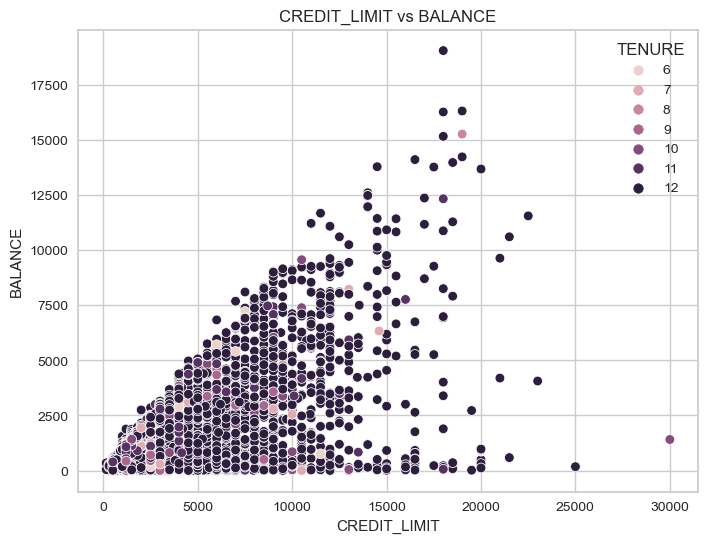

In [120]:
sns.scatterplot(data=df,x='CREDIT_LIMIT', y='BALANCE', hue = 'TENURE')
plt.title('CREDIT_LIMIT vs BALANCE');

- Pada gambar diatas dapat dilihat bahwa sebagian besar nasabah kartu kredit lebih memillih lama waktu pembayaran kreditnya atau lama tenor banyak nasabah yang memilih tenor 12 bulan. 

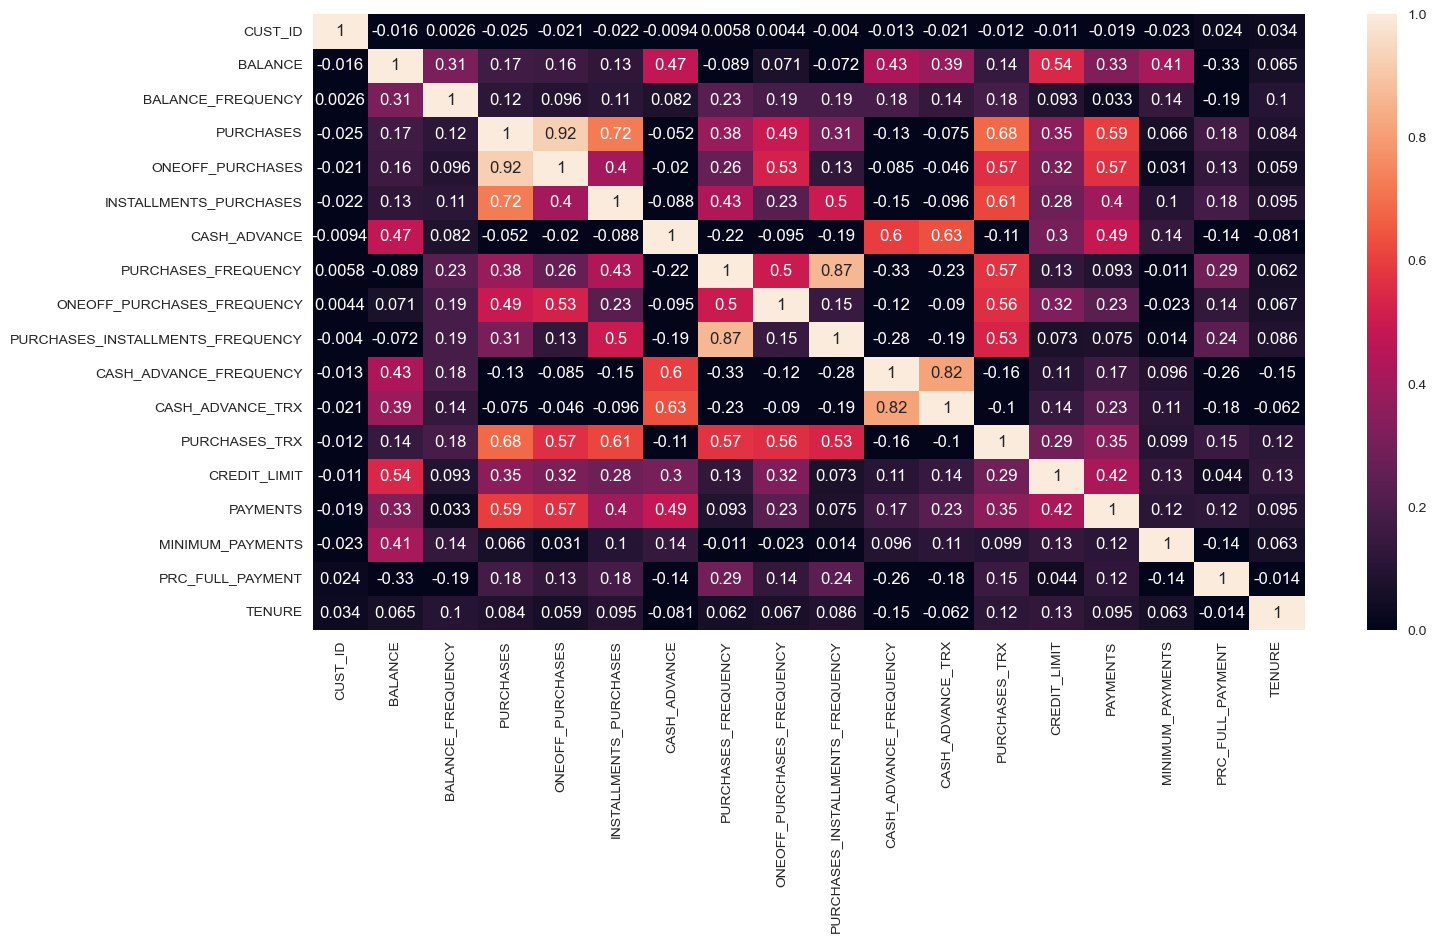

In [121]:
# Heatmap korelasi antara variabel
corr = df.corr()

plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot= True, vmin=0, vmax=1)
plt.show()

- Melihat korelasi diantara parameter yang ada

In [122]:
# Pemanggilan fungsi untuk jumlah nilai unik (nunique) untuk setiap variabel dalam dataset
def count_unique_values(df):
    unique_data = pd.DataFrame()
    unique_data["variables"] = df.columns
    unique_data["nunique"] = [df[var].nunique() for var in df.columns]
    return unique_data

In [123]:
unique_df = count_unique_values(df)
print(unique_df)

                           variables  nunique
0                            CUST_ID     4316
1                            BALANCE     4313
2                  BALANCE_FREQUENCY       38
3                          PURCHASES     3118
4                   ONEOFF_PURCHASES     2022
5             INSTALLMENTS_PURCHASES     2292
6                       CASH_ADVANCE     2091
7                PURCHASES_FREQUENCY       47
8         ONEOFF_PURCHASES_FREQUENCY       44
9   PURCHASES_INSTALLMENTS_FREQUENCY       47
10            CASH_ADVANCE_FREQUENCY       46
11                  CASH_ADVANCE_TRX       55
12                     PURCHASES_TRX      147
13                      CREDIT_LIMIT      151
14                          PAYMENTS     4316
15                  MINIMUM_PAYMENTS     4316
16                  PRC_FULL_PAYMENT       47
17                            TENURE        7


- Menghitung jumlah nilai unik dari setiap kolom.

In [124]:
# Membuat salinan dataset dan memasukannya ke variabel baru
nba = df.copy()

In [125]:
# Menghapus kolom cust_id
nba.drop(['CUST_ID'], axis=1, inplace=True)

In [126]:
# Menghapus kolom tenure
nba.drop(['TENURE'], axis=1, inplace=True)

In [127]:
# Calculating VIF (Multicollinearity)
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values(by=['VIF'],ascending=False)
    return(vif)

In [128]:
jk = nba.iloc[:,[0,2,3,4,5,10,11,12,13,14,15]]
calc_vif(jk)

,variables,VIF
1,PURCHASES,63426.533636
2,ONEOFF_PURCHASES,33590.516800
3,INSTALLMENTS_PURCHASES,11121.867504
0,BALANCE,3.748033
8,PAYMENTS,3.747873
7,CREDIT_LIMIT,3.520492
4,CASH_ADVANCE,3.402869
6,PURCHASES_TRX,2.719313
5,CASH_ADVANCE_TRX,2.088137
10,PRC_FULL_PAYMENT,1.496162


- Kolom yang digunakan hanya kolom numerikal saja
- Tidak ada yang dihapus dari variabel yang memiliki nilai vif besar, karena menurut saya ketiga variabel tersebut penting

# VI. Feature Engineering / Preprocessing

## -Handling Outliers- ##

In [129]:
# Check skewness pada dataset
for i in jk.columns:
    print(i, ': ', jk[i].skew())

BALANCE :  2.440901091038025
PURCHASES :  8.902272454100581
ONEOFF_PURCHASES :  10.045515316290516
INSTALLMENTS_PURCHASES :  8.030304885938177
CASH_ADVANCE :  4.713174552567423
CASH_ADVANCE_TRX :  4.722877319817404
PURCHASES_TRX :  4.429897311633816
CREDIT_LIMIT :  1.525378783156858
PAYMENTS :  5.987444897467956
MINIMUM_PAYMENTS :  12.356757627194938
PRC_FULL_PAYMENT :  1.8543999106579778


- Outliers akan dihandling dengan metode Tukey's rule dikarenakan distribusi data tidak normal

In [130]:
# Menghitung outliers pada kolom BALANCE dengan IQR
Q1 = nba['BALANCE'].quantile(.25)
Q3 = nba['BALANCE'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

outlier = nba[(nba['BALANCE'] <= lower) | (nba['BALANCE'] >= upper)]

print('Persentase outliers pada kolom BALANCE: ', len(outlier)/df.shape[0] * 100, '%')
print('Upper boundary: ', upper)
print('Lower boundary: ', lower)

Persentase outliers pada kolom BALANCE:  2.201112140871177 %
Upper boundary:  7991.156440500001
Lower boundary:  -5725.832245250001


In [131]:
# Menghitung outliers pada kolom PURCHASES dengan IQR
Q1 = nba['PURCHASES'].quantile(.25)
Q3 = nba['PURCHASES'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

outlier = nba[(nba['PURCHASES'] <= lower) | (nba['PURCHASES'] >= upper)]

print('Persentase outliers pada kolom PURCHASES: ', len(outlier)/df.shape[0] * 100, '%')
print('Upper boundary: ', upper)
print('Lower boundary: ', lower)

Persentase outliers pada kolom PURCHASES:  4.008341056533828 %
Upper boundary:  4465.772500000001
Lower boundary:  -3271.1700000000005


In [132]:
# Menghitung outliers pada kolom ONEOFF_PURCHASES dengan IQR
Q1 = nba['ONEOFF_PURCHASES'].quantile(.25)
Q3 = nba['ONEOFF_PURCHASES'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

outlier = nba[(nba['ONEOFF_PURCHASES'] <= lower) | (nba['ONEOFF_PURCHASES'] >= upper)]

print('Persentase outliers pada kolom ONEOFF_PURCHASES: ', len(outlier)/df.shape[0] * 100, '%')
print('Upper boundary: ', upper)
print('Lower boundary: ', lower)

Persentase outliers pada kolom ONEOFF_PURCHASES:  5.954587581093605 %
Upper boundary:  2400.0
Lower boundary:  -1800.0


In [133]:
# Menghitung outliers pada kolom INSTALLMENTS_PURCHASES dengan IQR
Q1 = nba['INSTALLMENTS_PURCHASES'].quantile(.25)
Q3 = nba['INSTALLMENTS_PURCHASES'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

outlier = nba[(nba['INSTALLMENTS_PURCHASES'] <= lower) | (nba['INSTALLMENTS_PURCHASES'] >= upper)]

print('Persentase outliers pada kolom INSTALLMENTS_PURCHASES: ', len(outlier)/df.shape[0] * 100, '%')
print('Upper boundary: ', upper)
print('Lower boundary: ', lower)

Persentase outliers pada kolom INSTALLMENTS_PURCHASES:  4.054680259499537 %
Upper boundary:  1994.3700000000001
Lower boundary:  -1495.7775000000001


In [134]:
# Menghitung outliers pada kolom CASH_ADVANCE dengan IQR
Q1 = nba['CASH_ADVANCE'].quantile(.25)
Q3 = nba['CASH_ADVANCE'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

outlier = nba[(nba['CASH_ADVANCE'] <= lower) | (nba['CASH_ADVANCE'] >= upper)]

print('Persentase outliers pada kolom CASH_ADVANCE: ', len(outlier)/df.shape[0] * 100, '%')
print('Upper boundary: ', upper)
print('Lower boundary: ', lower)

Persentase outliers pada kolom CASH_ADVANCE:  5.514365152919369 %
Upper boundary:  4440.994105
Lower boundary:  -3330.74557875


In [135]:
# Menghitung outliers pada kolom CASH_ADVANCE_TRX dengan IQR
Q1 = nba['CASH_ADVANCE_TRX'].quantile(.25)
Q3 = nba['CASH_ADVANCE_TRX'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

outlier = nba[(nba['CASH_ADVANCE_TRX'] <= lower) | (nba['CASH_ADVANCE_TRX'] >= upper)]

print('Persentase outliers pada kolom CASH_ADVANCE_TRX: ', len(outlier)/df.shape[0] * 100, '%')
print('Upper boundary: ', upper)
print('Lower boundary: ', lower)

Persentase outliers pada kolom CASH_ADVANCE_TRX:  4.5644114921223355 %
Upper boundary:  16.0
Lower boundary:  -12.0


In [136]:
# Menghitung outliers pada kolom PURCHASES_TRX dengan IQR
Q1 = nba['PURCHASES_TRX'].quantile(.25)
Q3 = nba['PURCHASES_TRX'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

outlier = nba[(nba['PURCHASES_TRX'] <= lower) | (nba['PURCHASES_TRX'] >= upper)]

print('Persentase outliers pada kolom PURCHASES_TRX: ', len(outlier)/df.shape[0] * 100, '%')
print('Upper boundary: ', upper)
print('Lower boundary: ', lower)

Persentase outliers pada kolom PURCHASES_TRX:  3.985171455050973 %
Upper boundary:  65.0
Lower boundary:  -47.0


In [137]:
# Menghitung outliers pada kolom CREDIT_LIMIT dengan IQR
Q1 = nba['CREDIT_LIMIT'].quantile(.25)
Q3 = nba['CREDIT_LIMIT'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

outlier = nba[(nba['CREDIT_LIMIT'] <= lower) | (nba['CREDIT_LIMIT'] >= upper)]

print('Persentase outliers pada kolom CREDIT_LIMIT: ', len(outlier)/df.shape[0] * 100, '%')
print('Upper boundary: ', upper)
print('Lower boundary: ', lower)

Persentase outliers pada kolom CREDIT_LIMIT:  0.13901760889712697 %
Upper boundary:  21500.0
Lower boundary:  -13500.0


In [138]:
# Menghitung outliers pada kolom PAYMENTS dengan IQR
Q1 = nba['PAYMENTS'].quantile(.25)
Q3 = nba['PAYMENTS'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

outlier = nba[(nba['PAYMENTS'] <= lower) | (nba['PAYMENTS'] >= upper)]

print('Persentase outliers pada kolom PAYMENTS: ', len(outlier)/df.shape[0] * 100, '%')
print('Upper boundary: ', upper)
print('Lower boundary: ', lower)

Persentase outliers pada kolom PAYMENTS:  4.402224281742354 %
Upper boundary:  6535.835018500001
Lower boundary:  -4153.040854000001


In [139]:
# Menghitung outliers pada kolom MINIMUM_PAYMENTS dengan IQR
Q1 = nba['MINIMUM_PAYMENTS'].quantile(.25)
Q3 = nba['MINIMUM_PAYMENTS'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

outlier = nba[(nba['MINIMUM_PAYMENTS'] <= lower) | (nba['MINIMUM_PAYMENTS'] >= upper)]

print('Persentase outliers pada kolom MINIMUM_PAYMENTS: ', len(outlier)/df.shape[0] * 100, '%')
print('Upper boundary: ', upper)
print('Lower boundary: ', lower)

Persentase outliers pada kolom MINIMUM_PAYMENTS:  4.633920296570899 %
Upper boundary:  2812.991433
Lower boundary:  -1812.45601425


In [140]:
# Menghitung outliers pada kolom PRC_FULL_PAYMENT dengan IQR
Q1 = nba['PRC_FULL_PAYMENT'].quantile(.25)
Q3 = nba['PRC_FULL_PAYMENT'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

outlier = nba[(nba['PRC_FULL_PAYMENT'] <= lower) | (nba['PRC_FULL_PAYMENT'] >= upper)]

print('Persentase outliers pada kolom PRC_FULL_PAYMENT: ', len(outlier)/df.shape[0] * 100, '%')
print('Upper boundary: ', upper)
print('Lower boundary: ', lower)

Persentase outliers pada kolom PRC_FULL_PAYMENT:  10.681186283595922 %
Upper boundary:  0.666668
Lower boundary:  -0.500001


- Berdasarkan hasil persentase outliers dari masing-masing kolom, maka outliers akan dihandling dengan di capping/cencoring menggunakan (Winsorizer), dikarenakan jika handling menggunakan cara trimming akan menyebabakan kehilangan banyak data.
- Winsorizer merupakan teknik dalam data preprocessing yang digunakan untuk mengatasi masalah outlier dengan cara mengganti nilai-nilai ekstrim pada data dengan nilai batas atas atau bawah yang telah ditentukan sebelumnya. Nilai-nilai outlier yang lebih tinggi dari batas atas akan diganti dengan nilai batas atas, sedangkan nilai-nilai outlier yang lebih rendah dari batas bawah akan diganti dengan nilai batas bawah supaya distribusinya menjadi normal.
(sumber : http://repository.fe.unj.ac.id/2495/6/Chapter3.pdf)

In [141]:
# Handling outliers dengan metode IQR
wins = Winsorizer(capping_method='iqr', fold=3, tail='both')
jk_wins = wins.fit_transform(jk)

In [142]:
# Scaling
scaler = RobustScaler()
jk_scaler = pd.DataFrame(scaler.fit_transform(jk_wins))
jk_scaler.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.013723,-0.249982,0.111742,-0.192231,0.0,0.0,-0.375,-0.40,-0.431647,0.152096,0.0
1,-0.232315,0.186107,0.915075,-0.192231,0.0,0.0,-0.375,-0.40,-0.403678,-0.239546,0.0
2,0.069863,0.968716,2.356742,-0.192231,0.0,0.0,-0.375,-0.30,-0.312611,-0.125367,0.0
3,0.673895,-0.234602,0.140075,-0.192231,0.0,0.0,-0.375,-0.10,-0.347967,0.609892,0.0
4,-0.250922,0.742528,1.940075,-0.192231,0.0,0.0,-0.375,-0.36,-0.535158,-0.383280,0.0


- RobustScaler digunakan untuk menyesuaikan distribusi data yang memiliki skewness atau nilai ekstrem. Algoritma ini mengubah data dengan menskalakan dan memindahkan nilai data sehingga nilai median data adalah nol dan jarak antara kuartil pertama dan ketiga sama dengan satu.
- Dengan melakukan ini, RobustScaler dapat menangani outlier atau nilai yang jauh dari nilai tengah dataset. Sebagai hasilnya, distribusi data yang semula tidak normal dapat menjadi lebih simetris dan berdistribusi normal setelah diubah menggunakan RobustScaler. Algoritma ini berguna dalam pemrosesan data yang sensitif terhadap outlier atau nilai ekstrem, seperti clustering atau regresi linier.

## -PCA-

In [143]:
# Fit PCA
pca = PCA(random_state=0)
pca.fit(jk_scaler)

PCA(random_state=0)

- PCA adalah singkatan dari Principal Component Analysis, yaitu teknik analisis data multivariat yang digunakan untuk mengurangi dimensi variabel dalam data dengan memproyeksikannya ke dalam ruang fitur yang lebih rendah.
Kelebihan PCA antara lain:
- Memperkecil dimensi data: PCA dapat mengurangi jumlah variabel dalam data dengan memilih fitur terbaik yang mewakili informasi utama dalam data, sehingga mengurangi kompleksitas data.
- Mengidentifikasi korelasi: PCA dapat membantu mengidentifikasi korelasi antara variabel dalam data, sehingga dapat membantu memahami hubungan antara variabel.
- Memudahkan visualisasi: Dengan mengurangi dimensi data, PCA dapat memudahkan visualisasi data dalam bentuk grafik yang mudah dipahami.
Namun, PCA juga memiliki kekurangan, di antaranya:
- Interpretasi yang sulit: PCA dapat membuat interpretasi hasil yang lebih sulit karena variabel yang dihasilkan dari PCA merupakan kombinasi linier dari variabel asli.
- Kerentanan terhadap outlier: PCA rentan terhadap pengaruh outlier karena outlier dapat mempengaruhi hasil PCA dan memperburuk interpretasi.
- Sensitif terhadap skala: PCA dapat menjadi sensitif terhadap perbedaan skala dalam variabel, sehingga memerlukan normalisasi sebelum dilakukan PCA.

In [144]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [145]:
np.cumsum(pca.explained_variance_ratio_)

array([0.32321566, 0.61301669, 0.742249  , 0.81831101, 0.87709496,
       0.91882663, 0.94885633, 0.96870987, 0.98743235, 0.99767133,
       1.        ])

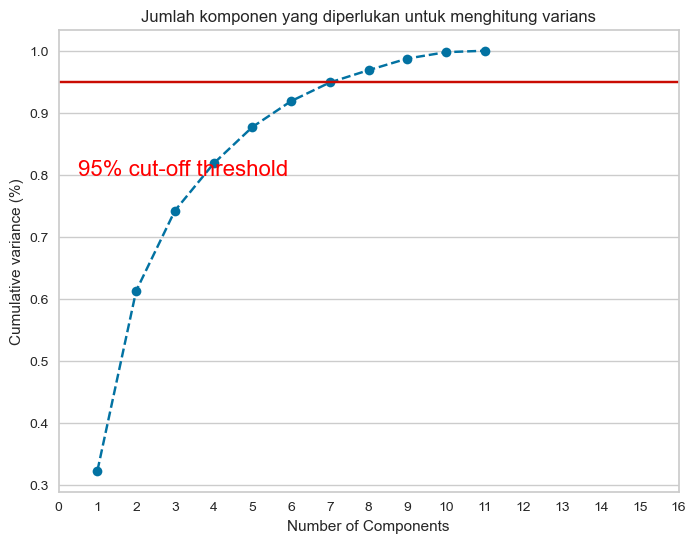

In [146]:
# Plot ke grafik
plt.rcParams["figure.figsize"] = (8,6)

fig, ax = plt.subplots()
xi = np.arange(1, 12, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 17, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('Jumlah komponen yang diperlukan untuk menghitung varians')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.80, '95% cut-off threshold', color = 'red', fontsize=16)
ax.grid(axis='x')
plt.show()

- Dari informasi diatas maka dapat disimpulkan bahwa n_component untuk PCA yang dapat menjelaskan 95 % variansi adalah 7 komponen
- Dari gambar di atas dapat dilihat bahwa kenaikan variansi diatas 95 % tidak signifikan maka  95 % dipilih , namun penambahan komponennya signifikan

In [147]:
# Reduksi komponen menggunakan PCA
pca_final = PCA(n_components=7)
pca_final.fit(jk_scaler)
X_pca = pca_final.transform(jk_scaler)

In [148]:
print('Shape sebelum reduksi komponen ', jk_scaler.shape)
print('---')
print('Shape setelah reduksi komponen ', X_pca.shape)
print('Jumlah komponen setelah reduksi ', pca_final.n_components_)
print('Variansi yang dapat dijelaskan ', round((np.sum(pca_final.explained_variance_ratio_)*100),2))

Shape sebelum reduksi komponen  (4316, 11)
---
Shape setelah reduksi komponen  (4316, 7)
Jumlah komponen setelah reduksi  7
Variansi yang dapat dijelaskan  94.89


Dari data yang diberikan, dapat disimpulkan bahwa:
- Shape awal data adalah (4316, 11), yang berarti data terdiri dari 4316 baris dan 11 kolom.
- Setelah dilakukan reduksi komponen, shape data berubah menjadi (4316, 7), yang berarti data sekarang terdiri dari 4316 baris dan 7 kolom. Hal ini menunjukkan bahwa dimensi data telah berkurang dari 11 menjadi 7 setelah dilakukan reduksi komponen.
- Jumlah komponen setelah reduksi adalah 7, yang merupakan jumlah dimensi baru dari data setelah reduksi.
- Variansi yang dapat dijelaskan setelah reduksi komponen adalah 94.89 %, yang merupakan proporsi dari variasi total dalam data yang dapat dijelaskan oleh 7 komponen utama yang dipilih dalam reduksi komponen. Hal ini menunjukkan bahwa dengan menggunakan 7 komponen utama saja, kita dapat menjelaskan sebagian besar variasi dalam data (94.89 %).
- Secara umum, reduksi komponen adalah teknik yang digunakan untuk mengurangi dimensi dalam data dengan memilih subset dari fitur yang paling penting. Hasil reduksi komponen seringkali lebih mudah untuk dimengerti dan dianalisis, dan dapat mempercepat proses pemodelan.

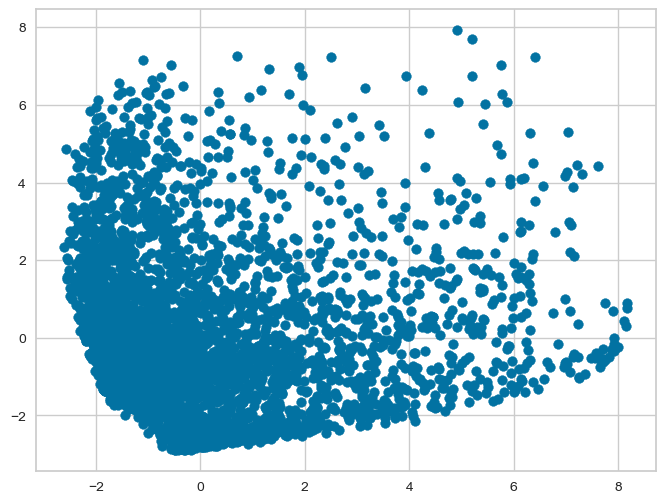

In [149]:
plt.scatter(X_pca[:,0], X_pca[:,1])

- Dapat dilihat dari gambar di atas bahwa data tersebar pada dua dimensi, sebaran data paling banyak ada antara rentangan plot -2 sampai 2 dan membantu untuk mengidentifikasi pola atau cluster dalam data.

# VII. Model Definition 

1. Algoritma yang digunakan pada project ini yaitu K-Means untuk Clustering
- K-Means clustering adalah algoritma unsupervised learning yang dipakai untuk mengelompokkan dataset yang belum dilabel ke dalam kluster yang berbeda. Simbol K pada K-means clustering menandakan jumlah kluster yang digunakan. Algoritma K-Means dipilih untuk clustering karena ia merupakan salah satu algoritma clustering yang paling populer dan efektif. Algoritma ini dapat mengelompokkan data ke dalam beberapa kelompok berdasarkan jarak antara data satu dengan yang lainnya. K-Means bekerja dengan cara mengelompokkan data ke dalam kelompok-kelompok yang memiliki jarak terdekat dengan centroid, yaitu titik pusat dari kelompok tersebut. Algoritma ini bekerja dengan cara mengiterasi untuk menentukan posisi centroid yang optimal untuk setiap kelompok, sehingga jarak antara data dengan centroid menjadi seminimal mungkin. Kelebihan Algoritma K-means.
- Adapun kelebihan dari algoritma K-Means adalah sebagai berikut:
1. Relatif sederhana dan mudah untuk diterapkan.
2. Dapat diskalakan untuk dataset dalam jumlah besar.
3. Mudah beradaptasi dengan contoh baru.
4. Umum diimplementasikan ke cluster dengan bentuk dan ukuran yang berbeda, seperti cluster elips.
- Kekurangan Algoritma K-means. Adapun kelemahan atau kekurangan dari algoritma K-means di antaranya:
1. Perlu menentukan nilai k secara manual
2. Sangat bergantung pada inisialisasi awal. Jika nilai random untuk inisialisasi kurang baik, maka pengelompokkan yang dihasilkan pun menjadi kurang optimal.
3. Dapat terjadi curse of dimensionality. Masalah ini timbul jika dataset memiliki dimensi yang sangat tinggi. Cara kerja algoritma ini adalah mencari jarak terdekat antara k buah titik dengan titik lainnya. Mencari jarak antar titik pada 2 dimensi, kemungkinan masih mudah dilakukan. Namun apabila dimensi bertambah menjadi 20 tentunya hal ini akan menjadi sulit.
4. K-means mengalami kesulitan mengelompokkan data di mana cluster memiliki ukuran dan kepadatan yang bervariasi.

(sumber : https://www.trivusi.web.id/2022/06/algoritma-kmeans-clustering.html)

2. Metrics Elbow dan Silhouette untuk Evaluasi Kualitas Clustering
- Dalam memilih metrik evaluasi clustering, Elbow dan Silhouette adalah dua metrik evaluasi clustering yang paling umum digunakan. Kedua metrik ini digunakan untuk mengukur kualitas clustering berdasarkan jarak antara titik-titik data dalam suatu kelompok dan antara kelompok-kelompok.
- Elbow method merupakan salah satu metode yang digunakan untuk menentukan jumlah cluster n_clusters yang paling optimal atau digunakan untuk menentukan jumlah kelompok optimal dalam algoritma clustering. Metrik ini didasarkan pada prinsip bahwa ketika jumlah kelompok meningkat, maka nilai dalam-cluster sum of squares (WCSS) akan semakin menurun. Namun, pada titik tertentu, penurunan WCSS akan menjadi lebih lambat. Titik tersebut disebut elbow point. Jumlah kelompok yang dipilih adalah jumlah kelompok sebelum elbow point, karena penambahan kelompok setelah elbow point tidak memberikan perbaikan yang signifikan.
- Silhouette method: Metrik ini digunakan untuk menentukan seberapa baik setiap titik data cocok dalam kelompoknya dan seberapa berbedanya kelompok tersebut dengan kelompok lain. Metrik ini memberikan skor pada setiap titik data, dengan rentang nilai antara -1 dan 1. Nilai yang lebih dekat dengan 1 menunjukkan bahwa titik data tersebut lebih sesuai dengan kelompoknya, sedangkan nilai yang lebih dekat dengan -1 menunjukkan bahwa titik data tersebut lebih cocok dalam kelompok lain. Nilai 0 menunjukkan bahwa titik data tersebut sama baiknya dalam kedua kelompok. Dalam evaluasi clustering, nilai rata-rata silhouette dihitung dan semakin tinggi nilainya, semakin baik kualitas clusteringnya.

(sumber : https://deepnote.com/@dimas-pradana/k-Means-Clustering-Duplicate-dce12187-671e-4851-950e-639a73cba534)

# VIII. Model Training

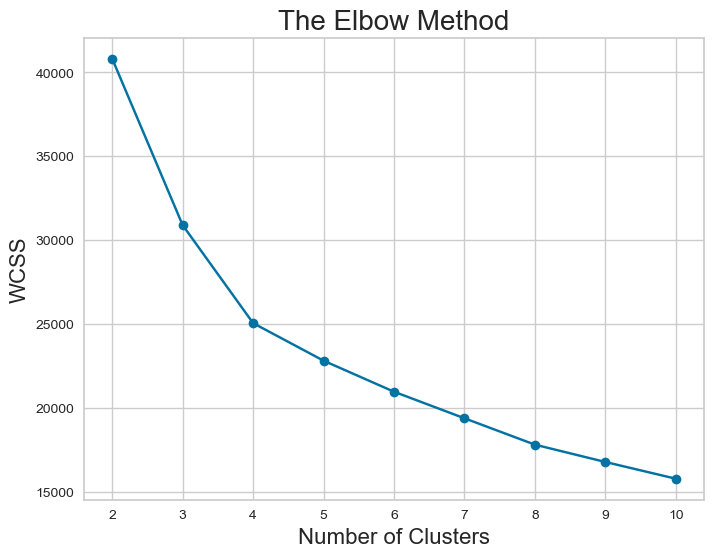

In [150]:
# Membuat variabel kosong atau penampung wcss
wcss = []

# Membuat iterasi dari 2-10 untuk nilai k terbaik
for i in range(2, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X_pca)
    wcss.append(km.inertia_)

#Membuat visualisasi wcss
plt.plot(range(2, 11), wcss, marker ="o")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters', fontsize = 16)
plt.ylabel('WCSS', fontsize = 16)
plt.show()

- Berdasarkan gambar pada metode elbow tersebut bahwa patahan berada pada cluster 4.  Dapat diartikan bahwa penambahan cluster diatas 4, tidak berpengaruh signifikan terhadap variansi
- Metode elbow digunakan untuk membantu menentukan jumlah cluster yang optimal pada data menggunakan algoritma clustering seperti K-Means. Pada metode elbow, sumbu x menunjukkan jumlah cluster yang digunakan, sedangkan sumbu y menunjukkan varians yang dijelaskan oleh model K-Means.
- Patahan pada grafik elbow menunjukkan titik di mana penurunan varians mulai menurun secara signifikan. Dalam hal ini, patahan terjadi pada jumlah cluster 4, yang berarti bahwa dengan menggunakan 4 cluster, varians yang dapat dijelaskan oleh model K-Means mulai berkurang secara signifikan.

In [151]:
# Print Average Silhouette Score
for i in np.arange(2,8):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(X_pca)
  score = silhouette_score(X_pca, km.labels_, metric='euclidean')
  print('Silhouette Score Komponen', i ,':' ,'%.3f' % score)

Silhouette Score Komponen 2 : 0.375
Silhouette Score Komponen 3 : 0.350
Silhouette Score Komponen 4 : 0.344
Silhouette Score Komponen 5 : 0.320
Silhouette Score Komponen 6 : 0.299
Silhouette Score Komponen 7 : 0.307


- Silhouette Score adalah metrik evaluasi kualitas pengelompokan (clustering) yang mengukur seberapa baik setiap data poin dalam suatu cluster dibandingkan dengan poin-poin dalam cluster lain. Metrik ini memiliki rentang nilai antara -1 hingga 1, dengan nilai yang lebih tinggi menunjukkan bahwa pengelompokan lebih baik.
- Berdasarkan nilai Silhouette Score yang diberikan, dapat dilihat bahwa nilai tertinggi diperoleh pada komponen kedua, yaitu 0.375. Nilai Silhouette Score pada komponen 2 yang lebih tinggi dari 0.5 dapat dianggap sebagai indikasi bahwa pengelompokan pada komponen tersebut cukup baik. Sementara itu, nilai Silhouette Score pada komponen 3, 4, 5, dan 6 juga cukup baik, namun nilai-nilai tersebut sedikit lebih rendah dibandingkan dengan nilai pada komponen kedua. Hal ini menunjukkan bahwa pengelompokan pada komponen-komponen tersebut masih cukup baik

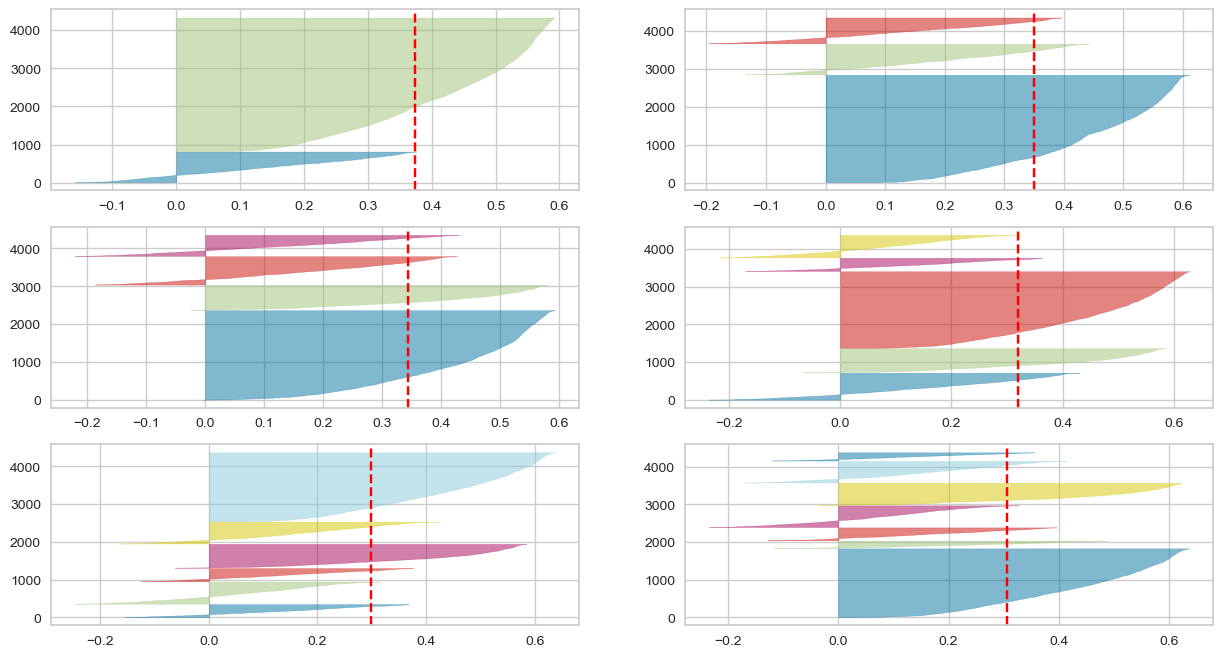

In [152]:

# Visualisasi Silhouette Score
fig, ax = plt.subplots(3, 2, figsize = (15,8))
for i in np.arange(2,8):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  q, mod = divmod(i,2)

  visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax = ax[q-1][mod])
  visualizer.fit(X_pca)

- Dalam menentukan jumlah cluster (n_clusters) pada metode Silhouette, ada dua faktor yang harus dipertimbangkan, yaitu rata-rata nilai Silhouette Score untuk setiap cluster dan jumlah data pada setiap cluster.
- Berdasarkan kedua faktor tersebut, dipilihlah n_clusters sebanyak 4. Hal ini dikarenakan Silhouette Score untuk 4 cluster lebih baik dibandingkan dengan jumlah cluster di atas 4 dan jumlah data pada setiap cluster juga lebih merata dibandingkan dengan cluster-cluster yang diuji.
- Selain itu, dalam menentukan jumlah cluster juga digunakan metode elbow dan silhouette. Berdasarkan kedua metode tersebut, n_clusters yang dipilih adalah 4 karena pada elbow method, penambahan n_clusters di atas 4 tidak berpengaruh signifikan terhadap variansi inertia, sedangkan pada silhouette method, jumlah data pada 4 cluster lebih merata dan memiliki nilai Silhouette Score yang lebih baik dibandingkan dengan jumlah cluster di atas 4.

In [153]:
# Fit,Training dan predict KMeans
km_final = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
clusters = km_final.fit_predict(X_pca)
clusters

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [154]:
# Print iterasi yang konvergen
km_final.n_iter_

8

- Menampilkan jumlah iterasi yang diperlukan oleh algoritma k-means untuk mencapai konvergensi saat dilakukan pelatihan pada data.
- Semakin tinggi nilai n_iter_, semakin lama waktu yang dibutuhkan oleh algoritma untuk mencapai konvergensi pada data tersebut. Nilai n_iter_ yang besar juga dapat menunjukkan bahwa data memiliki pola yang kompleks atau memiliki banyak noise.
- Secara umum, 8 iterasi adalah jumlah yang relatif rendah, yang dapat menunjukkan bahwa data relatif mudah untuk dikelompokkan dengan k-means 

In [155]:
# Reduksi komponen menggunakan PCA
pca_visualisasi = PCA(n_components=2)
pca_visualisasi.fit(jk_scaler)
X_visualisasi = pca_visualisasi.transform(jk_scaler)

In [156]:
# Membuat dataframe PC1 dan PC2
reduced_data= pd.DataFrame(X_visualisasi, columns= ['PC1','PC2'])
reduced_data.head()

,PC1,PC2
0,-1.587783,-1.132701
1,-1.017610,-1.293755
2,0.065140,-0.891513
3,-1.477093,-0.577725
4,-0.318652,-1.263765


In [157]:
# Membuat kolom baru yang bernama Clusters
reduced_data['Clusters']= clusters
reduced_data

,PC1,PC2,Clusters
0,-1.587783,-1.132701,0
1,-1.017610,-1.293755,0
2,0.065140,-0.891513,0
3,-1.477093,-0.577725,0
4,-0.318652,-1.263765,0
...,...,...,...
4311,-1.841697,0.302052,0
4312,-1.425148,1.793389,2
4313,-0.625275,2.087340,2
4314,0.285549,4.991923,2


In [158]:
reduced_data.Clusters.unique()

array([0, 1, 3, 2], dtype=int32)

- Dataset dibagi berdasarkan 4 cluster

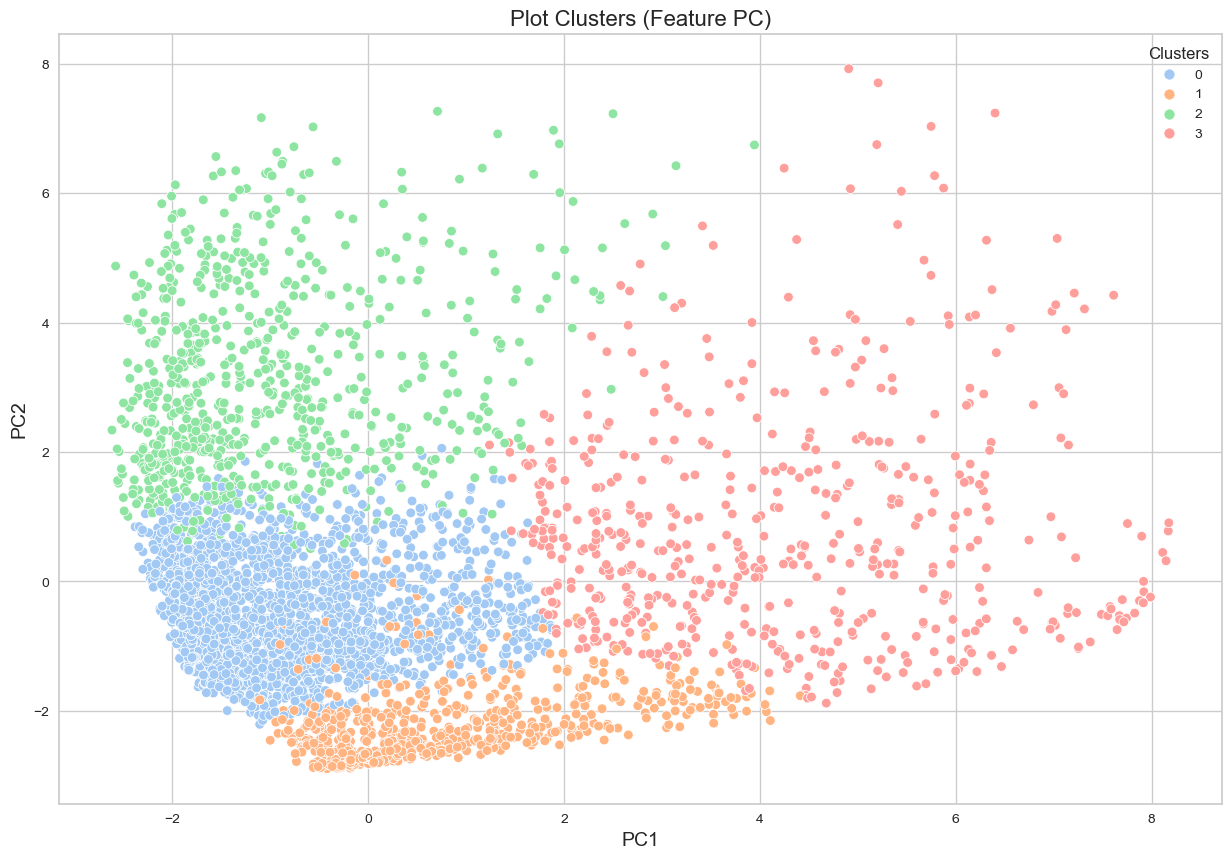

In [159]:
# Visualisasi cluster
plt.figure(figsize=(15,10))
sns.scatterplot(x='PC1', y='PC2', data=reduced_data, hue="Clusters",palette='pastel')
plt.title('Plot Clusters (Feature PC)',fontsize=16)
plt.xlabel('PC1',fontsize=14)
plt.ylabel('PC2',fontsize=14)
plt.show()

- Dari hasil plot tersebut, kita dapat mengevaluasi seberapa baik algoritma clustering yang digunakan dalam memisahkan pengguna ke dalam kelompok-kelompok yang berbeda. Berdasarkan hasil di atas dapat dilihat algoritma clustering sudah baik dalam memisahkan pengguna dalam kelompok-kelompoknya, tetapi masih bisa diperbaiki agar menjadi lebih baik, karena masih terdapat warna-warna yang bercampuran
- Lebih spesifik, dari plot tersebut, kita dapat melihat seberapa jelas batas antara cluster yang berbeda. Jika terdapat kelompok yang tercampur antara satu sama lain, maka mungkin diperlukan penyesuaian pada parameter atau penggunaan metode clustering yang berbeda.
- Selain itu, kita dapat memeriksa apakah terdapat pola tertentu dalam pengelompokkan data, misalnya apakah cluster 1 cenderung berada di bagian kiri bawah plot dan cluster 2 berada di bagian kanan atas plot. Hal ini dapat membantu kita mengidentifikasi apakah terdapat kelompok pengguna dengan karakteristik tertentu yang lebih sering muncul pada suatu cluster.
- Terakhir, dari plot tersebut, kita juga dapat melihat apakah terdapat pengguna yang mungkin menjadi outlier, yaitu pengguna yang terletak jauh dari pusat cluster atau berada pada daerah yang tidak termasuk ke dalam satu cluster tertentu.

# IX. Model Evaluation

In [160]:
# Concat dengan cluster
df_cluster = jk_scaler.copy()
df_cluster['Clusters']= clusters
df_cluster

,0,1,2,3,4,5,6,7,8,9,10,Clusters
0,0.013723,-0.249982,0.111742,-0.192231,0.000000,0.00,-0.3750,-0.40,-0.431647,0.152096,0.000000,0
1,-0.232315,0.186107,0.915075,-0.192231,0.000000,0.00,-0.3750,-0.40,-0.403678,-0.239546,0.000000,0
2,0.069863,0.968716,2.356742,-0.192231,0.000000,0.00,-0.3750,-0.30,-0.312611,-0.125367,0.000000,0
3,0.673895,-0.234602,0.140075,-0.192231,0.000000,0.00,-0.3750,-0.10,-0.347967,0.609892,0.000000,0
4,-0.250922,0.742528,1.940075,-0.192231,0.000000,0.00,-0.3750,-0.36,-0.535158,-0.383280,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4311,0.082832,-0.343172,-0.059925,-0.192231,1.134495,2.25,-0.4375,-0.36,0.330844,-0.058444,0.545453,0
4312,-0.054660,-0.343172,-0.059925,-0.192231,3.440376,1.75,-0.4375,0.23,2.290600,-0.103420,0.545453,2
4313,1.260377,0.164375,0.652108,0.076044,1.808742,2.25,0.8125,1.42,0.107767,0.871801,0.000000,2
4314,2.002405,1.100746,2.599958,-0.192231,3.926441,4.00,1.1250,0.60,0.020565,3.128034,0.545453,2


In [161]:
# Mengganti nama kolom dengan nama asli
columns_original = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX','PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
df_cluster = df_cluster.rename(columns=dict(enumerate(columns_original)))

In [162]:
df_cluster

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,Clusters
0,0.013723,-0.249982,0.111742,-0.192231,0.000000,0.00,-0.3750,-0.40,-0.431647,0.152096,0.000000,0
1,-0.232315,0.186107,0.915075,-0.192231,0.000000,0.00,-0.3750,-0.40,-0.403678,-0.239546,0.000000,0
2,0.069863,0.968716,2.356742,-0.192231,0.000000,0.00,-0.3750,-0.30,-0.312611,-0.125367,0.000000,0
3,0.673895,-0.234602,0.140075,-0.192231,0.000000,0.00,-0.3750,-0.10,-0.347967,0.609892,0.000000,0
4,-0.250922,0.742528,1.940075,-0.192231,0.000000,0.00,-0.3750,-0.36,-0.535158,-0.383280,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4311,0.082832,-0.343172,-0.059925,-0.192231,1.134495,2.25,-0.4375,-0.36,0.330844,-0.058444,0.545453,0
4312,-0.054660,-0.343172,-0.059925,-0.192231,3.440376,1.75,-0.4375,0.23,2.290600,-0.103420,0.545453,2
4313,1.260377,0.164375,0.652108,0.076044,1.808742,2.25,0.8125,1.42,0.107767,0.871801,0.000000,2
4314,2.002405,1.100746,2.599958,-0.192231,3.926441,4.00,1.1250,0.60,0.020565,3.128034,0.545453,2


In [163]:
# Print Statistik Deskripsi Dasar dari setiap Cluster
pd.set_option("display.max.columns",None)
df_cluster.groupby('Clusters').describe()

BALANCE                                                              \
           count      mean       std       min       25%       50%       75%   
Clusters                                                                       
0         2360.0  0.058006  0.510152 -0.467804 -0.366097 -0.032224  0.290536   
1          656.0 -0.422041  0.059231 -0.467799 -0.455072 -0.438896 -0.407770   
2          748.0  1.523564  1.174273 -0.427940  0.520332  1.311224  2.400710   
3          552.0  0.723316  1.135772 -0.467804 -0.205201  0.338248  1.322108   

                   PURCHASES                                          \
               max     count      mean       std       min       25%   
Clusters                                                               
0         2.640288    2360.0  0.041210  0.452542 -0.343172 -0.343172   
1         0.553236     656.0  0.403622  0.639694 -0.343172 -0.087792   
2         3.610212     748.0  0.037609  0.596788 -0.343172 -0.343172   
3         3.610212     552.0  2.689334  0.896403  0.360652  1.901348   

                                       ONEOFF_PURCHASES                      \
               50%       75%       max            count      mean       std   
Clusters                                                                      
0        -0.121938  0.245375  2.296962           2360.0  0.334732  0.656742   
1         0.188184  0.708815  2.761026            656.0  0.405081  0.849106   
2        -0.276980  0.190954  3.697237            748.0  0.327373  0.757387   
3         2.727853  3.697237  3.697237            552.0  2.900675  1.280684   

                                                            \
               min       25%       50%       75%       max   
Clusters                                                     
0        -0.059925 -0.059925 -0.059925  0.487883  3.940075   
1        -0.059925 -0.059925 -0.059925  0.528196  3.940075   
2        -0.059925 -0.059925 -0.059925  0.348425  3.940075   
3        -0.059925  2.071729  3.618183  3.940075  3.940075   

         INSTALLMENTS_PURCHASES                                          \
                          count      mean       std       min       25%   
Clusters                                                                  
0                        2360.0  0.183849  0.624979 -0.192231 -0.192231   
1                         656.0  0.867312  1.075214 -0.192231  0.078170   
2                         748.0  0.163473  0.748004 -0.192231 -0.192231   
3                         552.0  2.080187  1.437397 -0.192231  0.810497   

                                       CASH_ADVANCE                           \
               50%       75%       max        count      mean       std  min   
Clusters                                                                       
0        -0.192231  0.354373  3.807769       2360.0  0.329002  0.540797  0.0   
1         0.499566  1.316170  3.807769        656.0  0.049583  0.238358  0.0   
2        -0.192231  0.091818  3.807769        748.0  2.792679  1.142756  0.0   
3         2.147535  3.807769  3.807769        552.0  0.370473  0.881115  0.0   

                                               CASH_ADVANCE_TRX            \
              25%      50%       75%       max            count      mean   
Clusters                                                                    
0         0.00000  0.00000  0.446397  2.946256           2360.0  0.415678   
1         0.00000  0.00000  0.000000  2.516375            656.0  0.058689   
2         1.87315  2.93074  4.000000  4.000000            748.0  2.418783   
3         0.00000  0.00000  0.130895  4.000000            552.0  0.351902   

                                             PURCHASES_TRX            \
               std  min  25%  50%   75%  max         count      mean   
Clusters                                                               
0         0.643542  0.0  0.0  0.0  0.50  4.0        2360.0  0.061944   
1         0.289090  0.0  0.0  0.0  0.00

In [164]:
df_cluster[df_cluster['Clusters'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,2360.0,0.058006,0.510152,-0.467804,-0.366097,-0.032224,0.290536,2.640288
PURCHASES,2360.0,0.041210,0.452542,-0.343172,-0.343172,-0.121938,0.245375,2.296962
ONEOFF_PURCHASES,2360.0,0.334732,0.656742,-0.059925,-0.059925,-0.059925,0.487883,3.940075
INSTALLMENTS_PURCHASES,2360.0,0.183849,0.624979,-0.192231,-0.192231,-0.192231,0.354373,3.807769
CASH_ADVANCE,2360.0,0.329002,0.540797,0.000000,0.000000,0.000000,0.446397,2.946256
CASH_ADVANCE_TRX,2360.0,0.415678,0.643542,0.000000,0.000000,0.000000,0.500000,4.000000
PURCHASES_TRX,2360.0,0.061944,0.617364,-0.437500,-0.437500,-0.125000,0.312500,3.625000
CREDIT_LIMIT,2360.0,0.026844,0.508405,-0.570000,-0.300000,-0.145000,0.200000,3.300000
PAYMENTS,2360.0,-0.028792,0.548677,-0.569490,-0.370065,-0.199479,0.102062,3.707569
MINIMUM_PAYMENTS,2360.0,0.270139,0.835719,-0.469061,-0.211158,-0.035256,0.427805,3.787970


- Dari hasil masing-masing clusters, kita dapat melihat bahwa setiap cluster memiliki nilai rata-rata dan standar deviasi yang berbeda pada setiap fiturnya. Berikut adalah penjelasan dari setiap fitur pada cluster 0:
1. Cluster 0:
- Balance: rata-rata cukup tinggi dan std deviasi juga cukup besar. Hal ini menunjukkan bahwa cluster ini cenderung memiliki saldo yang tinggi, namun dengan variasi yang cukup signifikan antara anggotanya.
- Purchases: rata-rata cukup rendah dan std deviasi cukup kecil. Hal ini menunjukkan bahwa cluster ini cenderung tidak banyak melakukan pembelian.
- Oneoff_purchases: rata-rata rendah dan std deviasi kecil. Hal ini menunjukkan bahwa cluster ini cenderung tidak banyak melakukan pembelian satu kali sebesar tertentu.
- Installments_purchases: rata-rata cukup tinggi dan std deviasi cukup besar. Hal ini menunjukkan bahwa cluster ini cenderung lebih banyak melakukan pembelian dalam angsuran.
- Cash_advance: rata-rata cukup tinggi dan std deviasi cukup besar. Hal ini menunjukkan bahwa cluster ini cenderung lebih sering melakukan penarikan tunai.
- Cash_advance_trx: rata-rata cukup tinggi dan std deviasi cukup besar. Hal ini menunjukkan bahwa cluster ini cenderung lebih sering melakukan transaksi penarikan tunai.
- Purchases_trx: rata-rata cukup tinggi dan std deviasi cukup besar. Hal ini menunjukkan bahwa cluster ini cenderung lebih sering melakukan transaksi pembelian.
- Credit_limit: rata-rata cukup tinggi dan std deviasi cukup besar. Hal ini menunjukkan bahwa cluster ini cenderung memiliki limit kredit yang tinggi.
- Payments: rata-rata cukup rendah dan std deviasi cukup kecil. Hal ini menunjukkan bahwa cluster ini cenderung tidak melakukan pembayaran yang cukup besar.
- Minimum_payments: rata-rata cukup rendah dan std deviasi cukup kecil. Hal ini menunjukkan bahwa cluster ini cenderung tidak melakukan pembayaran minimum yang cukup besar.
- PRC_full_payment: rata-rata cukup rendah dan std deviasi cukup kecil. Hal ini menunjukkan bahwa cluster ini cenderung tidak membayar total tagihan yang terutang.

In [165]:
df_cluster[df_cluster['Clusters'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,656.0,-0.422041,0.059231,-0.467799,-0.455072,-0.438896,-0.407770,0.553236
PURCHASES,656.0,0.403622,0.639694,-0.343172,-0.087792,0.188184,0.708815,2.761026
ONEOFF_PURCHASES,656.0,0.405081,0.849106,-0.059925,-0.059925,-0.059925,0.528196,3.940075
INSTALLMENTS_PURCHASES,656.0,0.867312,1.075214,-0.192231,0.078170,0.499566,1.316170,3.807769
CASH_ADVANCE,656.0,0.049583,0.238358,0.000000,0.000000,0.000000,0.000000,2.516375
CASH_ADVANCE_TRX,656.0,0.058689,0.289090,0.000000,0.000000,0.000000,0.000000,4.000000
PURCHASES_TRX,656.0,0.453792,0.742642,-0.437500,-0.062500,0.312500,0.687500,3.625000
CREDIT_LIMIT,656.0,0.230885,0.693646,-0.540000,-0.300000,0.000000,0.600000,3.700000
PAYMENTS,656.0,0.142462,0.654616,-0.527916,-0.304731,-0.070416,0.369188,3.707569
MINIMUM_PAYMENTS,656.0,-0.214710,0.314480,-0.458189,-0.283275,-0.236822,-0.204552,3.787970


Berdasarkan data tersebut, dapat dilihat karakteristik dari cluster 1 sebagai berikut:
- Rata-rata balance (nilai utang) yang dimiliki oleh pelanggan pada cluster ini lebih rendah dibandingkan dengan rata-rata balance dari pelanggan di cluster lainnya.
- Pelanggan pada cluster ini memiliki rata-rata pembelian yang cukup tinggi, baik pembelian one-off maupun pembelian dalam bentuk cicilan (installments).
- Pelanggan pada cluster ini cenderung lebih jarang melakukan transaksi cash advance dan juga jumlah transaksi cash advance-nya lebih sedikit dibandingkan dengan pelanggan di cluster lainnya.
- Rata-rata kredit limit pelanggan di cluster ini tidak terlalu tinggi dibandingkan dengan pelanggan di cluster lainnya.
- Pelanggan pada cluster ini cenderung memiliki kecenderungan untuk membayar sebagian besar atau seluruh tagihan pada setiap bulan.
- Secara keseluruhan, karakteristik pelanggan pada cluster ini adalah pelanggan yang melakukan pembelian secara teratur dan cenderung menghindari penggunaan fasilitas cash advance.

In [166]:
df_cluster[df_cluster['Clusters'] == 2].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,748.0,1.523564,1.174273,-0.427940,0.520332,1.311224,2.400710,3.610212
PURCHASES,748.0,0.037609,0.596788,-0.343172,-0.343172,-0.276980,0.190954,3.697237
ONEOFF_PURCHASES,748.0,0.327373,0.757387,-0.059925,-0.059925,-0.059925,0.348425,3.940075
INSTALLMENTS_PURCHASES,748.0,0.163473,0.748004,-0.192231,-0.192231,-0.192231,0.091818,3.807769
CASH_ADVANCE,748.0,2.792679,1.142756,0.000000,1.873150,2.930740,4.000000,4.000000
CASH_ADVANCE_TRX,748.0,2.418783,1.245543,0.000000,1.500000,2.500000,3.750000,4.000000
PURCHASES_TRX,748.0,-0.050301,0.631772,-0.437500,-0.437500,-0.375000,0.125000,3.625000
CREDIT_LIMIT,748.0,0.765882,0.735667,-0.400000,0.200000,0.600000,1.200000,3.200000
PAYMENTS,748.0,1.176774,1.323316,-0.518911,0.175542,0.687128,1.946509,3.707569
MINIMUM_PAYMENTS,748.0,1.587477,1.247576,-0.443467,0.570736,1.306965,2.440425,3.787970


Berdasarkan deskripsi di atas, cluster 2 memiliki karakteristik sebagai berikut:
- Rata-rata saldo akun nasabah (BALANCE) sebesar 1.52, yang menunjukkan nilai yang cukup tinggi.
- Rata-rata jumlah pembelian (PURCHASES) adalah 0.04, yang menunjukkan bahwa cluster ini cenderung melakukan pembelian yang lebih sedikit.
- Rata-rata pembelian satu kali (ONEOFF_PURCHASES) adalah 0.33, yang menunjukkan bahwa sebagian besar pembelian dilakukan dalam jumlah kecil.
- Rata-rata pembelian dengan angsuran (INSTALLMENTS_PURCHASES) adalah 0.16, yang menunjukkan bahwa sebagian besar pembelian dilakukan dengan cara mengangsur.
- Rata-rata jumlah penarikan tunai (CASH_ADVANCE) sebesar 2.79, yang menunjukkan bahwa nasabah dalam cluster ini cenderung lebih sering menarik tunai.
- Rata-rata jumlah transaksi tarik tunai (CASH_ADVANCE_TRX) adalah 2.42, yang menunjukkan bahwa nasabah dalam cluster ini sering melakukan transaksi tarik tunai.
- Rata-rata jumlah transaksi pembelian (PURCHASES_TRX) adalah -0.05, yang menunjukkan bahwa nasabah dalam cluster ini cenderung kurang aktif dalam bertransaksi pembelian.
- Batas kredit (CREDIT_LIMIT) rata-rata adalah 0.77, yang menunjukkan nilai yang cukup rendah.
- Rata-rata jumlah pembayaran (PAYMENTS) adalah 1.18, yang menunjukkan bahwa nasabah dalam cluster ini cenderung membayar dengan tepat waktu.
- Rata-rata pembayaran minimum (MINIMUM_PAYMENTS) adalah 1.59, yang menunjukkan bahwa nasabah dalam cluster ini cenderung membayar lebih dari jumlah minimum yang ditentukan.
- Persentase pembayaran penuh (PRC_FULL_PAYMENT) rata-rata adalah 0.27, yang menunjukkan bahwa sebagian besar pembayaran dilakukan secara angsuran.
- Berdasarkan karakteristik di atas, cluster 2 cenderung terdiri dari pemegang kartu kredit yang memiliki saldo yang tinggi, namun melakukan transaksi pembelian dan jumlah transaksi yang sedikit. Mereka juga cenderung menggunakan kartu kredit untuk penarikan uang tunai, dan membayar tagihan dengan jumlah yang lebih tinggi dari minimum yang dibutuhkan.
- Berdasarkan karakteristik cluster 2, pelanggan dalam cluster ini memiliki balance yang relatif tinggi dan cenderung melakukan pembelian dengan cicilan. Oleh karena itu, cluster ini berpotensi untuk ditawarkan produk-produk yang berkaitan dengan pembayaran dengan cicilan seperti program kredit dengan bunga rendah atau penawaran cicilan dengan bunga 0%. Selain itu, perusahaan juga dapat mempertimbangkan untuk menawarkan produk-produk lain yang sesuai dengan profil pelanggan dalam cluster ini, seperti produk investasi atau produk asuransi. 

In [167]:
df_cluster[df_cluster['Clusters'] == 3].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,552.0,0.723316,1.135772,-0.467804,-0.205201,0.338248,1.322108,3.610212
PURCHASES,552.0,2.689334,0.896403,0.360652,1.901348,2.727853,3.697237,3.697237
ONEOFF_PURCHASES,552.0,2.900675,1.280684,-0.059925,2.071729,3.618183,3.940075,3.940075
INSTALLMENTS_PURCHASES,552.0,2.080187,1.437397,-0.192231,0.810497,2.147535,3.807769,3.807769
CASH_ADVANCE,552.0,0.370473,0.881115,0.000000,0.000000,0.000000,0.130895,4.000000
CASH_ADVANCE_TRX,552.0,0.351902,0.826298,0.000000,0.000000,0.000000,0.250000,4.000000
PURCHASES_TRX,552.0,2.285326,1.179319,-0.375000,1.312500,2.312500,3.625000,3.625000
CREDIT_LIMIT,552.0,0.951624,0.873504,-0.510000,0.300000,0.800000,1.400000,3.700000
PAYMENTS,552.0,1.723360,1.240396,-0.456169,0.711479,1.538959,2.662875,3.707569
MINIMUM_PAYMENTS,552.0,0.844339,1.307224,-0.400359,-0.153515,0.282808,1.332604,3.787970


Berdasarkan data di atas, karakteristik cluster ke-3 adalah sebagai berikut:
- Balance: rata-rata nilai balance pada cluster 3 adalah 0.72, dengan standar deviasi sebesar 1.13. Ini menunjukkan bahwa kebanyakan dari pelanggan dalam cluster ini memiliki balance yang rendah hingga sedang.
- Purchases: rata-rata nilai purchases pada cluster 3 adalah 2.69, dengan standar deviasi sebesar 0.89. Ini menunjukkan bahwa kebanyakan dari pelanggan dalam cluster ini melakukan pembelian dengan nilai yang cukup besar.
- One-Off Purchases: rata-rata nilai one-off purchases pada cluster 3 adalah 2.90, dengan standar deviasi sebesar 1.28. Ini menunjukkan bahwa kebanyakan dari pelanggan dalam cluster ini melakukan pembelian dengan jumlah yang cukup besar dan biasanya hanya sekali.
- Installments Purchases: rata-rata nilai purchases melalui angsuran pada cluster 3 adalah 2.08, dengan standar deviasi sebesar 1.44. Ini menunjukkan bahwa kebanyakan dari pelanggan dalam cluster ini melakukan pembelian dengan jumlah yang cukup besar melalui angsuran.
- Cash Advance: rata-rata nilai cash advance pada cluster 3 adalah 0.37, dengan standar deviasi sebesar 0.88. Ini menunjukkan bahwa kebanyakan dari pelanggan dalam cluster ini tidak menggunakan fitur cash advance pada kartu kredit mereka.
- Cash Advance Transactions: rata-rata nilai transaksi cash advance pada cluster 3 adalah 0.35, dengan standar deviasi sebesar 0.83. Ini menunjukkan bahwa kebanyakan dari pelanggan dalam cluster ini tidak sering melakukan transaksi cash advance pada kartu kredit mereka.
- Purchase Transactions: rata-rata nilai transaksi pembelian pada cluster 3 adalah 2.29, dengan standar deviasi sebesar 1.18. Ini menunjukkan bahwa kebanyakan dari pelanggan dalam cluster ini sering melakukan transaksi pembelian.
- Credit Limit: rata-rata nilai credit limit pada cluster 3 adalah 0.95, dengan standar deviasi sebesar 0.87. Ini menunjukkan bahwa kebanyakan dari pelanggan dalam cluster ini memiliki credit limit yang cukup tinggi.
- Payments: rata-rata nilai payments pada cluster 3 adalah 1.72, dengan standar deviasi sebesar 1.24. Ini menunjukkan bahwa kebanyakan dari pelanggan dalam cluster ini membayar tagihan kartu kredit mereka dengan jumlah yang cukup besar.
- Rata-rata nilai pembayaran minimum (minimum_payments) sebesar 0.844339 berarti bahwa secara umum, pelanggan dalam cluster 3 cenderung membayar jumlah minimum yang lebih rendah dari tagihan kartu kredit mereka. Hal ini dapat disebabkan oleh berbagai faktor, seperti kebijakan bank yang memungkinkan pembayaran minimum yang lebih rendah atau kondisi keuangan individu yang sulit. 
- Rata-rata persentase pembayaran penuh (prc_full_payment) sebesar 1.121905 menunjukkan bahwa sebagian besar pelanggan dalam cluster 3 cenderung tidak membayar tagihan kartu kredit mereka secara penuh setiap bulannya. Sebaliknya, mereka cenderung membayar sebagian dari tagihan atau hanya membayar jumlah minimum yang diperlukan.

# X. Model Saving

In [168]:
# Save the Files

with open('scaler.pkl', 'wb') as file_1:
  joblib.dump(scaler, file_1)

with open('pca_final.pkl', 'wb') as file_2:
  joblib.dump(pca_final, file_2)

with open('km_final.pkl', 'wb') as file_3:
  joblib.dump(km_final, file_3)

with open('windsoriser.pkl', 'wb') as file_4:
  joblib.dump(jk_wins, file_4)

# XI. Kesimpulan

Setelah dilakukan alanisis customer dikelompokan menjadi 4 cluster berdasrakan kesamaan yang mereka miliki, yang disimpulkan per masing-masing cluster sebagai berikut ?
1. Berdasarkan deskripsi statistik dari cluster 0, dapat dilihat bahwa rata-rata nilai untuk variabel balance, purchases, oneoff_purchases, installments_purchases, dan cash_advance adalah positif. Hal ini menunjukkan bahwa pengguna di cluster 0 cenderung memiliki saldo, melakukan pembelian, dan pengambilan uang tunai yang lebih besar dibandingkan dengan pengguna di cluster lainnya. Namun demikian, terdapat variabel seperti credit_limit dan payments yang rata-ratanya adalah negatif. Hal ini dapat mengindikasikan bahwa pengguna di cluster 0 mungkin memiliki keterbatasan kredit dan kemungkinan besar melakukan pembayaran yang kurang tepat waktu. Sebagai kesimpulan, meskipun pengguna di cluster 0 cenderung melakukan pembelian dan pengambilan uang tunai yang lebih besar, namun adanya indikasi keterbatasan kredit dan potensi pembayaran yang kurang tepat waktu, maka perlu dilakukan analisis yang lebih mendalam sebelum menentukan apakah cluster ini berpotensi untuk ditawarkan produk atau tidak.
2. Cluster 1 memiliki karakteristik pelanggan yang melakukan pembelian secara teratur dan memiliki rata-rata pembelian yang cukup tinggi, baik pembelian one-off maupun pembelian dalam bentuk cicilan. Selain itu, pelanggan pada cluster ini cenderung memiliki kecenderungan untuk membayar sebagian besar atau seluruh tagihan pada setiap bulan.
Berdasarkan karakteristik tersebut, cluster 1 memiliki potensi untuk ditawarkan produk-produk yang berhubungan dengan kebutuhan pembelian sehari-hari atau produk yang memiliki nilai transaksi yang cukup tinggi. Contohnya, produk-produk seperti program loyalitas, cashback atau diskon pembelian tertentu, dan produk keuangan seperti asuransi atau investasi.
3. Dari segi bisnis, karakteristik cluster 2 menunjukkan bahwa pelanggan dalam cluster ini memiliki balance yang relatif tinggi dan cenderung melakukan pembelian dengan cicilan. Namun, mereka kurang aktif dalam menggunakan kredit cash advance dan memiliki rasio pembayaran penuh yang rendah. Mungkin ada kesempatan untuk mengembangkan strategi pemasaran yang lebih fokus pada penawaran cicilan atau kredit tunai untuk meningkatkan aktivitas pembelian mereka dan meningkatkan penggunaan fasilitas cash advance. Selain itu, perusahaan juga dapat mempertimbangkan untuk meningkatkan persentase pembayaran penuh pelanggan dalam cluster ini dengan menawarkan insentif atau program loyalitas yang dapat meningkatkan rasio pembayaran penuh mereka.
4. Dari hasil analisis sebelumnya, kita bisa melihat bahwa karakteristik pelanggan pada cluster 3 memiliki nilai rata-rata pembelian yang cukup tinggi (mean purchase = 2.69), namun cenderung melakukan pembelian dengan cicilan (mean installment purchases = 2.08) dan kurang memanfaatkan limit kredit yang disediakan (mean credit limit = 0.95). Dengan karakteristik seperti ini, bisnis bisa menawarkan produk atau program yang dapat mendorong pelanggan untuk memanfaatkan limit kredit yang lebih optimal, seperti program cashback atau diskon untuk pembelian dengan cara yang dapat meningkatkan nilai transaksi secara keseluruhan. Bisnis juga bisa menawarkan produk kredit yang lebih fleksibel dan menarik bagi pelanggan agar lebih tertarik untuk melakukan pembelian dengan cara yang lebih menguntungkan dan efisien.

## -Conceptual Problems-
Jawab pertanyaan berikut:

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?
Jawaban : Inertia pada algoritma K-Means merujuk pada sebuah ukuran yang digunakan untuk mengukur seberapa jauh titik-titik data dalam suatu cluster dari pusatnya (centroid). Inertia dihitung dengan menjumlahkan kuadrat jarak setiap titik data ke pusat cluster tempat titik data tersebut berada. Inertia digunakan sebagai fungsi tujuan pada algoritma K-Means untuk menentukan clustering yang optimal. Tujuan dari algoritma K-Means adalah untuk meminimalkan nilai inertia, sehingga semakin kecil nilai inertia maka semakin baik hasil clustering yang dihasilkan. Inertia pada algoritma K-Means merujuk pada sebuah ukuran yang digunakan untuk mengukur seberapa jauh titik-titik data dalam suatu cluster dari pusatnya (centroid). Inertia dihitung dengan menjumlahkan kuadrat jarak setiap titik data ke pusat cluster tempat titik data tersebut berada. Inertia digunakan sebagai fungsi tujuan pada algoritma K-Means untuk menentukan clustering yang optimal. Tujuan dari algoritma K-Means adalah untuk meminimalkan nilai inertia, sehingga semakin kecil nilai inertia maka semakin baik hasil clustering yang dihasilkan.
Menghitung nilai total jarak antara tiap titik dengan centroid terdekatnya yang dikenal sebagai inertia.
(sumber : https://tentangdata.wordpress.com/2017/11/14/clustering-dengan-k-means/comment-page-1/)

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan) !
Jawaban : 
- Elbow method adalah metoda yang sering dipakai untuk menentukan jumlah cluster yang akan digunakan pada k-means clustering. Cara kerja Elbow Method adalah dengan memplot nilai inertia untuk berbagai nilai jumlah cluster yang berbeda. Kemudian, kita mencari siku pada grafik inertia vs jumlah cluster, karena pada siku tersebut terjadi perubahan yang signifikan pada nilai inertia. Pada titik tersebut, penambahan jumlah cluster tidak lagi memberikan penurunan signifikan pada nilai inertia.
- Cara penggunaan Elbow Method adalah sebagai berikut:
- Lakukan clustering dengan menggunakan algoritma K-Means pada dataset yang akan di-cluster.
Hitung nilai inertia untuk setiap jumlah cluster yang berbeda.
Plot grafik inertia vs jumlah cluster.
Cari siku pada grafik dan nilai jumlah cluster pada titik tersebut adalah jumlah cluster optimal yang dapat digunakan.
Kelebihan dari Elbow Method adalah mudah digunakan dan memberikan gambaran kasar mengenai jumlah cluster yang optimal. Namun, kelemahan dari Elbow Method adalah hasilnya bersifat subjektif dan tidak selalu memberikan jawaban yang tepat mengenai jumlah cluster yang optimal. Selain itu, Elbow Method tidak selalu cocok untuk dataset dengan jumlah dimensi yang tinggi karena sulit untuk menggambarkan grafik inertia vs jumlah cluster pada dataset dengan dimensi yang tinggi.
(sumber : https://skillplus.web.id/elbow-method/)